## Support Vector Machines

In [38]:
# Import all required libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean, std
from sklearn import svm
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [39]:
# Import feature and target columns
X = pickle.load(open("./common/feature_status.p", "rb"))
y = pickle.load(open("./common/target_status.p", "rb"))

### Find the best parameter in SVM model

In [40]:
X_test = pickle.load(open("./common/metrics_test.p", "rb"))
X_train = pickle.load(open("./common/metrics_train.p", "rb"))
y_test = pickle.load(open("./common/status_test.p", "rb"))
y_train = pickle.load(open("./common/status_train.p", "rb"))

In [109]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.1, 1, 10, 100, 1000]}]

# Use 'f1_macro' as the scoring method
clf_c = GridSearchCV(svm.SVC(), tuned_parameters, scoring='f1_macro')

clf_c.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf_c.best_params_)

print("Grid scores on development set:")
means = clf_c.cv_results_['mean_test_score']
stds = clf_c.cv_results_['std_test_score']
for _mean, _std, _params in zip(means, stds, clf_c.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (_mean, _std * 2, _params))

print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
from sklearn.metrics import classification_report
y_true, y_pred = y_test, clf_c.predict(X_test)
print(classification_report(y_true, y_pred))

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConve

Best parameters set found on development set:
{'C': 100}
Grid scores on development set:
0.478 (+/-0.001) for {'C': 0.1}
0.776 (+/-0.036) for {'C': 1}
0.821 (+/-0.077) for {'C': 10}
0.855 (+/-0.055) for {'C': 100}
0.852 (+/-0.058) for {'C': 1000}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       399
           1       0.89      0.74      0.81        34

    accuracy                           0.97       433
   macro avg       0.94      0.86      0.90       433
weighted avg       0.97      0.97      0.97       433



c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
# Define the parameter ranges for gamma
gamma_range = np.logspace(-39, 23, 3)

# Create a dictionary with the hyperparameters
hyperparameters = {'gamma': gamma_range}

# Create a SVC model
svc = svm.SVC(kernel='rbf')

# Setup the grid search
# Set the scoring parameter to 'f1_macro' to use that as the scoring metric
clf_g = GridSearchCV(svc, hyperparameters, cv=10, verbose=1, scoring='f1_macro')

# Fit the grid search
clf_g.fit(X_train, y_train)

print('Best gamma:', clf_g.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConve

Best gamma: {'gamma': 1e-08}


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
# Define the parameter ranges for gamma
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

# Create a dictionary with the hyperparameters
hyperparameters = {'kernel': kernel}

# Create a SVC model
svc = svm.SVC()

# Setup the grid search
# Set the scoring parameter to 'f1_macro' to use that as the scoring metric
clf_k = GridSearchCV(svc, hyperparameters, cv=5, verbose=1, scoring='f1_macro')

# Fit the grid search
clf_k.fit(X_train, y_train)

print('Best kernel:', clf_k.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConve

Best kernel: {'kernel': 'linear'}


In [128]:
best_C = clf_c.best_params_['C']
best_gamma = clf_g.best_params_['gamma']
best_kernel = clf_k.best_params_['kernel']

print("Best C: ", best_C)
print("Best gamma: ", best_gamma)
print("Best kernel: ", best_kernel)


Best C:  100
Best gamma:  1e-08
Best kernel:  linear


### Perform Cross Validation

In [189]:
# Define the model
clf_cv = svm.SVC(C=best_C, kernel='rbf', gamma=best_gamma)

# Define metrics
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'precision_micro', 'recall_micro', 'f1_micro']

# Define the cross-validation procedure
cv = KFold(n_splits=10, shuffle=False)

# Evaluate the model using cross-validation
scores = cross_validate(clf_cv, X, y, scoring=scoring, cv=cv, n_jobs=-1)

In [190]:
# Print scores
print('MACRO:')
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_macro']), std(scores['test_precision_macro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_macro']), std(scores['test_recall_macro'])))
print('F1 score: %.3f (%.3f)' % (mean(scores['test_f1_macro']), std(scores['test_f1_macro'])))
print('')
print('MICRO:')
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_micro']), std(scores['test_precision_micro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_micro']), std(scores['test_recall_micro'])))
print('F1 score: %.3f (%.3f)' % (mean(scores['test_f1_micro']), std(scores['test_f1_micro'])))

MACRO:
Precision: 0.917 (0.081)
Recall: 0.876 (0.113)
F1 score: 0.893 (0.100)

MICRO:
Precision: 0.960 (0.042)
Recall: 0.960 (0.042)
F1 score: 0.960 (0.042)


### Train the model

In [191]:
X_test = pickle.load(open("./common/metrics_test.p", "rb"))
X_train = pickle.load(open("./common/metrics_train.p", "rb"))
y_test = pickle.load(open("./common/status_test.p", "rb"))
y_train = pickle.load(open("./common/status_train.p", "rb"))

In [192]:
# Create and train the model
clf = svm.SVC(C=best_C, kernel='rbf', gamma=best_gamma)
clf.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=1e-08)

In [193]:
# Use the model to make predictions on the test set
y_pred = clf.predict(X_test)

In [194]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.9722863741339491
Precision: 0.8928571428571429
Recall: 0.7352941176470589
F1: 0.806451612903226


### Visualize the model

In [195]:
clf_matrix = confusion_matrix(y_test, y_pred)
clf_matrix

array([[396,   3],
       [  9,  25]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

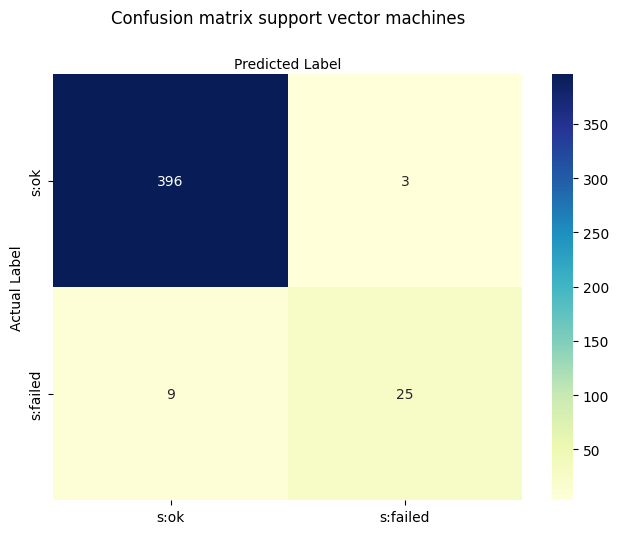

In [196]:
# Assuming clf_matrix is the confusion matrix you've computed
clf_matrix_df = pd.DataFrame(clf_matrix, index=["s:ok", "s:failed"], columns=["s:ok", "s:failed"])

# Create heatmap
class_names=["s:ok", "s:failed"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(clf_matrix_df, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix support vector machines', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Export the model

In [197]:
pickle.dump(clf, open("./models/svm.p", "wb"))